# WWTP inflow dataset: Horsens

## Loading data

In [78]:
import pandas as pd
import seaborn as sns

from os.path import abspath
from darts import TimeSeries

path_to_inflow = "../.preprocessing/raw_data/Horsens_250218.csv"
path_to_dmi_data = "../.preprocessing/raw_data/horsens_dmi_data.csv"

# Inflow measuring unit is m3/h
inflow = pd.read_csv(abspath(path_to_inflow), parse_dates=True, index_col=0, sep=";").rename(columns={"FB20F11_81": "inflow"})
inflow.index.name = "time"
inflow.index = inflow.index.tz_localize("Europe/Copenhagen", ambiguous="NaT").tz_convert("utc")

DMI always provides data in UTC (https://opendatadocs.dmi.govcloud.dk/en/Data/Climate_Data)

In [49]:
climate = pd.read_csv(abspath(path_to_dmi_data), parse_dates=True, index_col=0, sep=",")

In [50]:
horsens = inflow.merge(climate, left_index=True, right_index=True, how="inner")
horsens.head()

,inflow,acc_precip,mean_pressure,mean_radiation,mean_relative_hum,mean_temp,temp_grass,temp_soil_10,temp_soil_30
time,,,,,,,,,
2023-09-21 10:00:00+00:00,974.452333,0.0,998.4,535.0,68.5,20.8,20.5,15.0,14.6
2023-11-01 05:00:00+00:00,1701.950500,0.0,1005.4,0.0,98.0,-3.4,-3.6,8.2,9.7
2023-11-07 08:00:00+00:00,1338.937500,0.0,1000.8,53.0,98.3,4.0,1.3,8.5,9.5
2023-11-07 09:00:00+00:00,2243.327667,0.0,1001.1,162.0,98.5,7.6,5.6,8.5,9.4
2023-11-07 10:00:00+00:00,1988.214167,0.0,1001.7,166.0,95.5,8.6,9.5,8.4,9.4


### Visualization

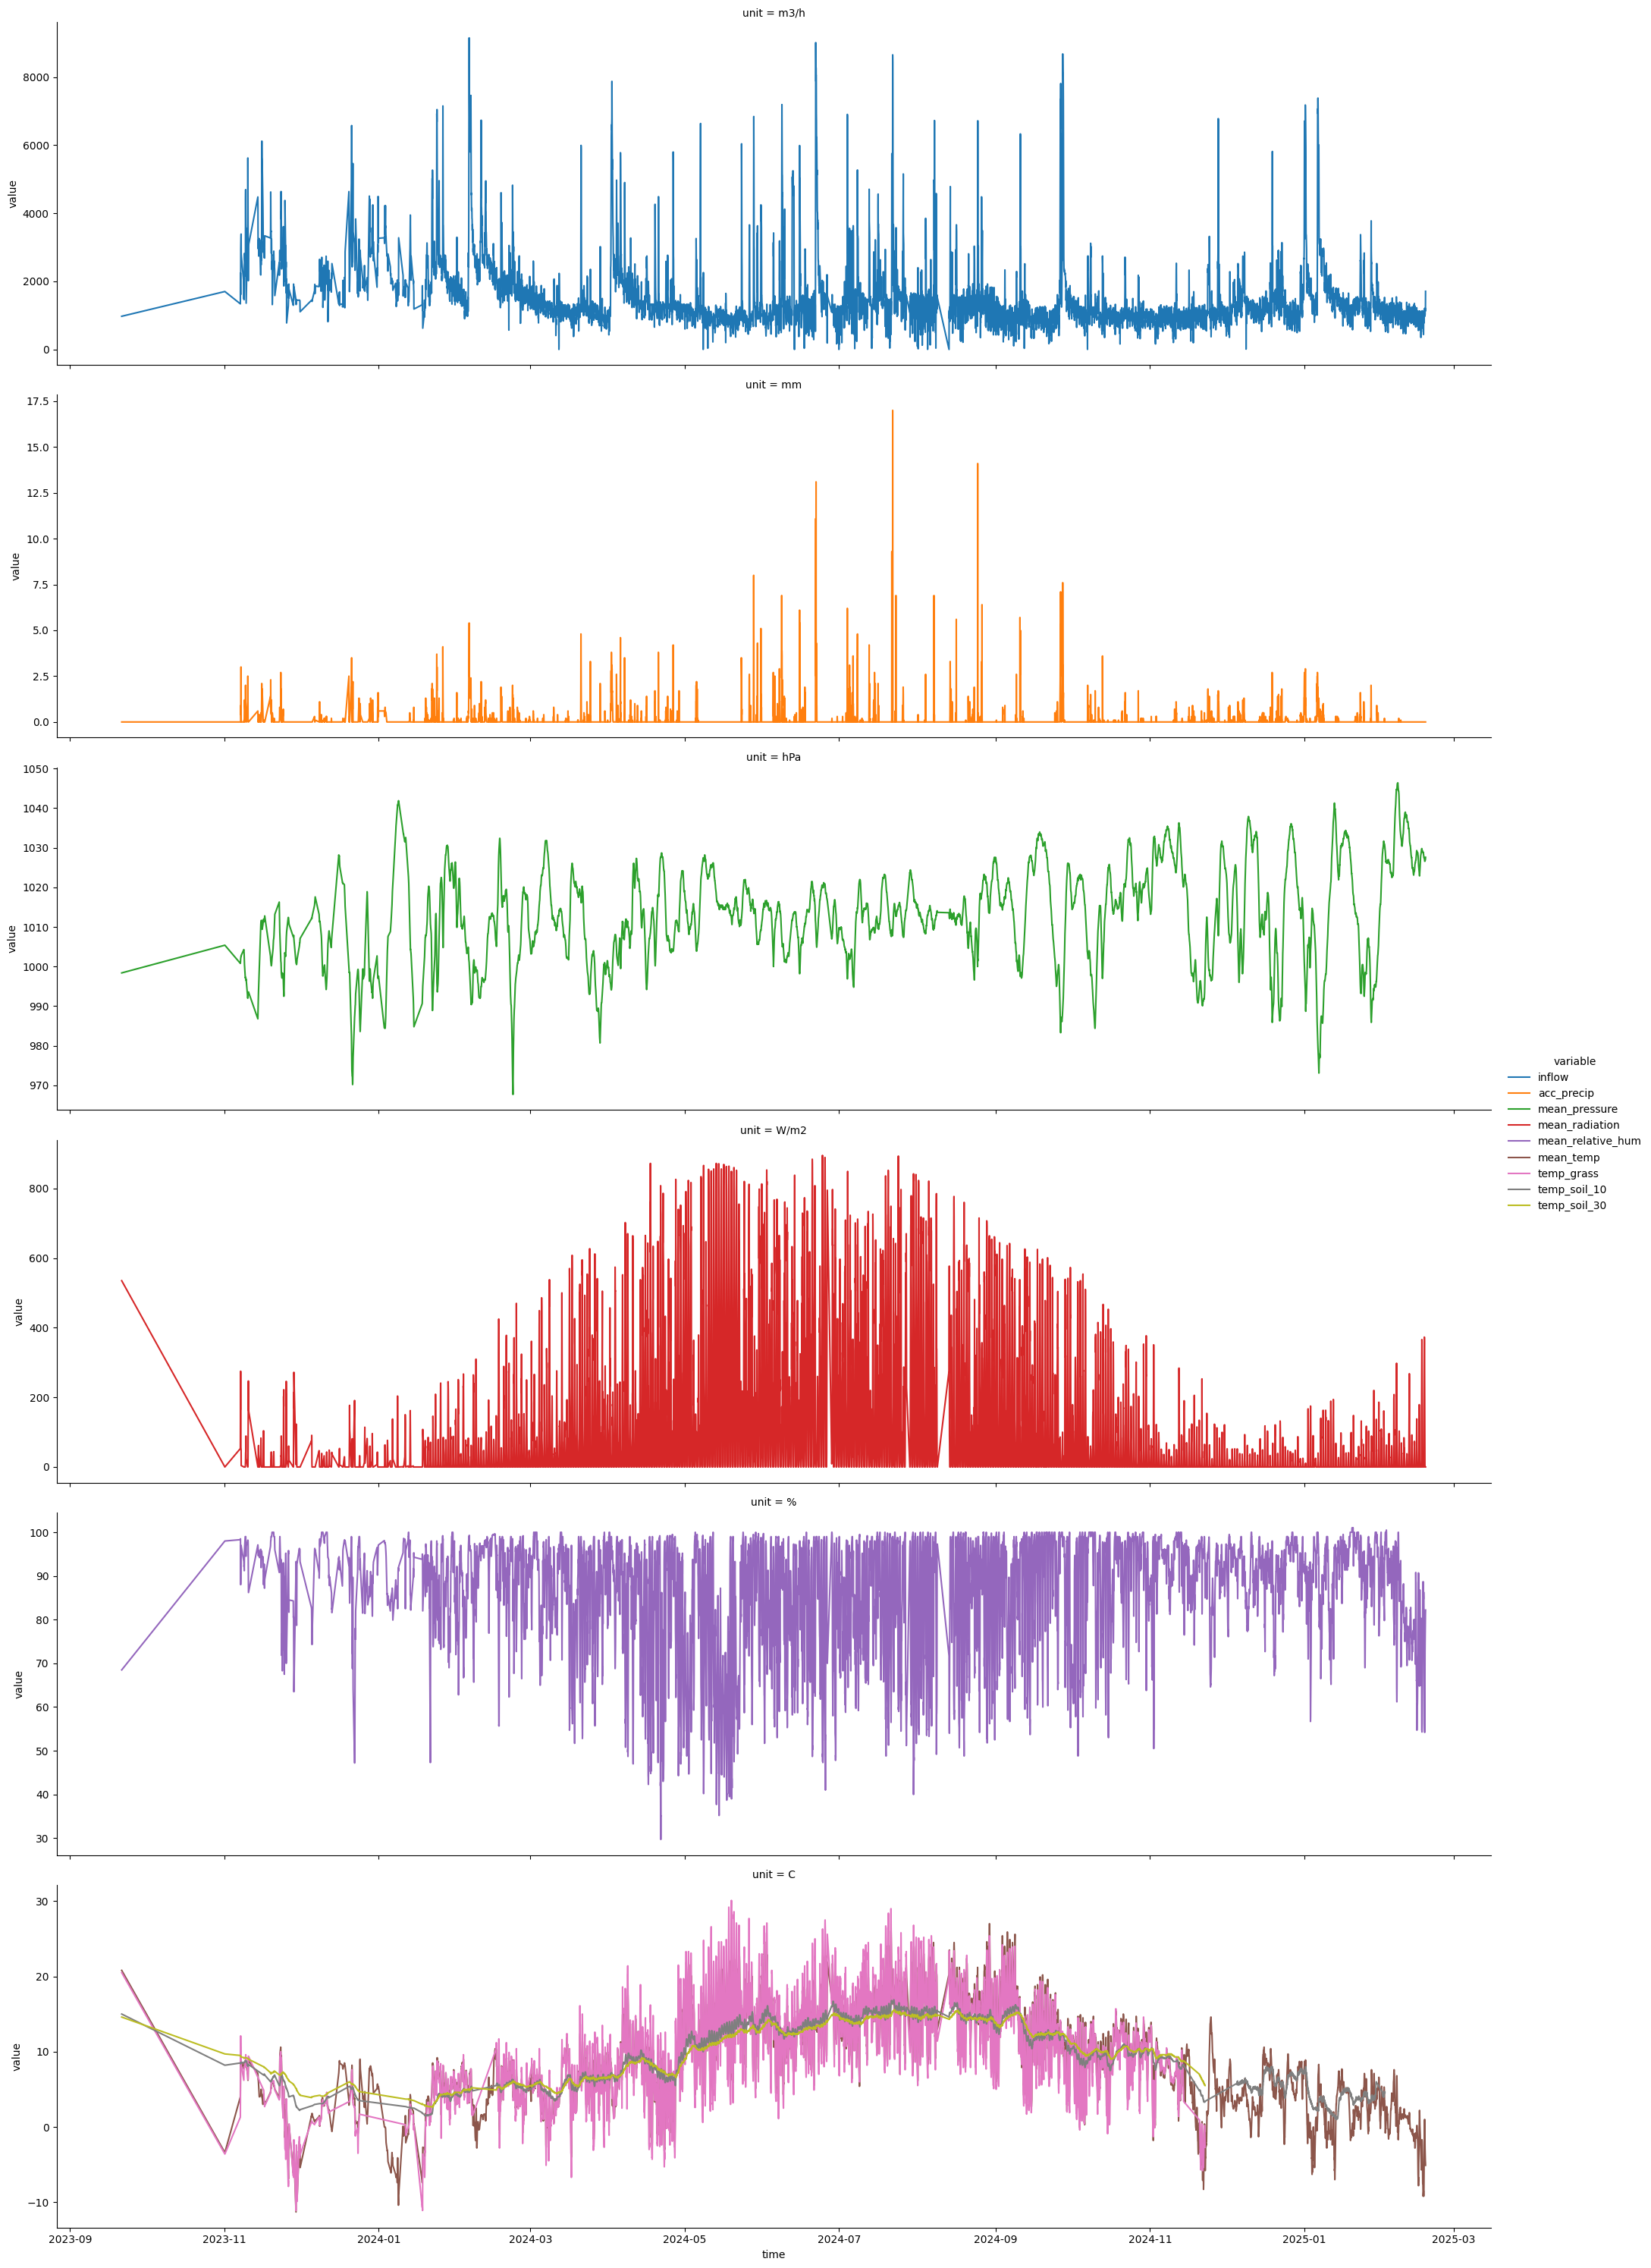

In [ ]:
units = {"inflow": "m3/h", "acc_precip": "mm", "mean_pressure": "hPa", "mean_radiation": "W/m2", "mean_relative_hum": "%", "mean_temp": "C", "temp_grass": "C", "temp_soil_10": "C", "temp_soil_30": "C"}

dfmelt = horsens.melt(ignore_index=False)
dfmelt["unit"] = dfmelt["variable"].map(units)
sns.relplot(dfmelt.reset_index(), x="time", y="value", row="unit", kind="line", hue="variable", facet_kws=dict(sharey=False), aspect=4);

### Gaps

In [83]:
ts = TimeSeries.from_dataframe(horsens, freq="h")
ts.gaps()["gap_size"].describe()

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


count     63.000000
mean      39.761905
std      123.437814
min        1.000000
25%        7.000000
50%       14.000000
75%       31.500000
max      978.000000
Name: gap_size, dtype: float64